In [4]:
import pandas as pd
data = pd.read_csv('bank-full.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


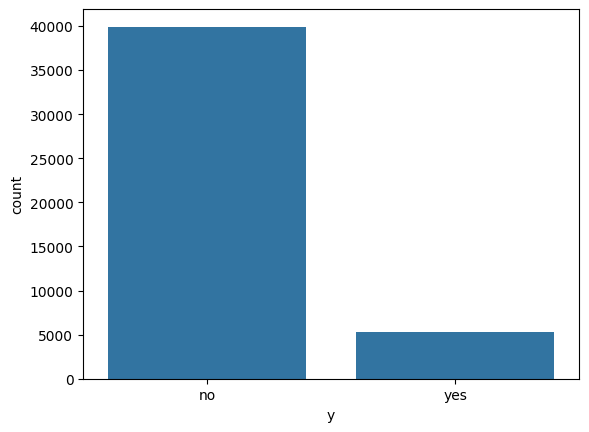

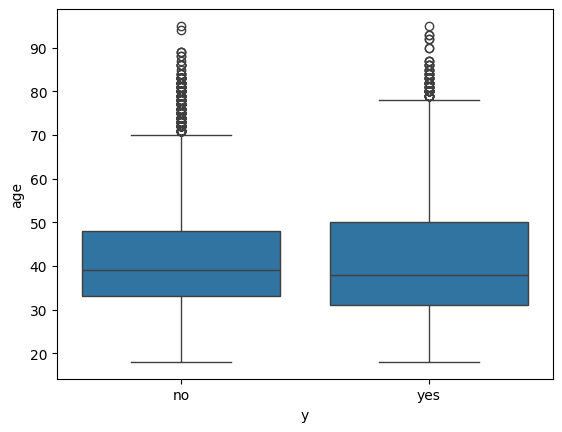

In [5]:
#vizualizarea datelor
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuția variabilei țintă "y"
sns.countplot(x='y', data=data)
plt.show()

# dacă există un tipar sau o corelație între vârsta unei persoane și decizia sa de a spune "da" sau "nu" campaniei de marketing
sns.boxplot(x='y', y='age', data=data)
plt.show()

In [7]:
data.describe()  # Pentru variabile numerice
data.describe(include='object') # Pentru variabile categorice

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [8]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [9]:
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['duration'] < (Q1 - 1.5 * IQR)) | (data['duration'] > (Q3 + 1.5 * IQR)))]

In [10]:
data = pd.get_dummies(data, drop_first=True) #Transformă variabilele categorice în format numeric (one-hot encoding)

Datele de train si test

In [11]:
from sklearn.model_selection import train_test_split
X = data.drop('y_yes', axis=1)  # "y_yes" e variabila țintă după encoding
y = data['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scalează datele
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Antrenează și evaluează modelul
lr = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr.predict(X_test_scaled)))

Logistic Regression Accuracy: 0.9281800857551215


Decisional Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.903644592663173


Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9349690328727965


Compararea performantelor

<ipython-input-21-ff62928362c7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


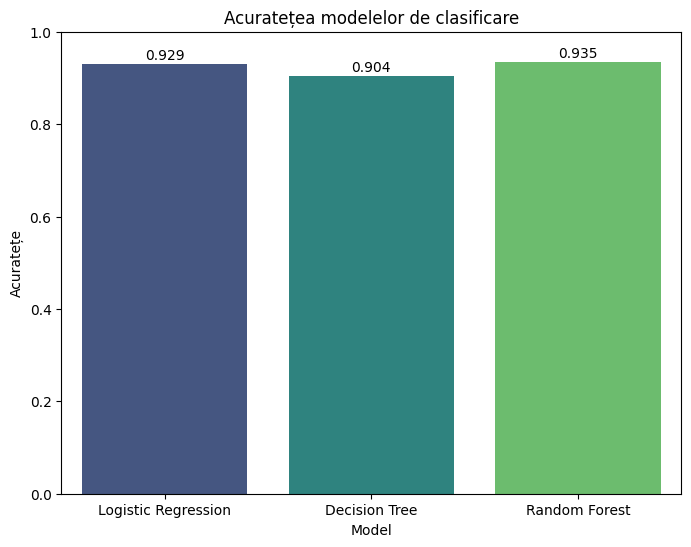

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title('Acuratețea modelelor de clasificare')
plt.ylim(0, 1)  # Acuratețea e între 0 și 1
plt.ylabel('Acuratețe')
plt.xlabel('Model')
for i, v in enumerate(results['Accuracy']):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')  # Adaugă valoarea deasupra barelor
plt.show()

Matricea de confuzie

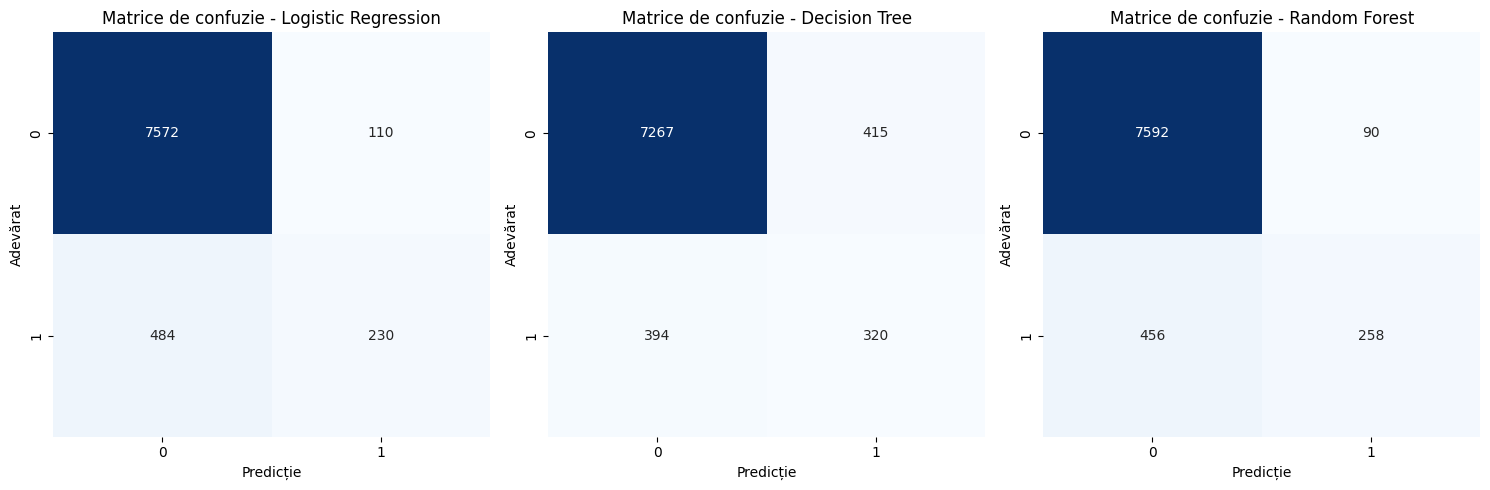

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Liste cu predicțiile și numele modelelor
predictions = [y_pred_lr, y_pred_dt, y_pred_rf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(15, 5))
for i, (y_pred, name) in enumerate(zip(predictions, model_names), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matrice de confuzie - {name}')
    plt.xlabel('Predicție')
    plt.ylabel('Adevărat')
plt.tight_layout()
plt.show()

In [25]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [26]:
!wget -q -O - ipv4.icanhazip.com

35.237.0.172


In [29]:
! streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.0.172:8501

⠇your url is: https://tall-dryers-cheer.loca.lt
  Stopping...
^C
